<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BA/blob/main/PyCaret.png?raw=true" width="270" height="">
</p>


<p align="justify"><b>
<font color="DeepPink">
💗 Todo el mundo deberia aprender a programar, porque te enseña a pensar...
</font>
</p>
<p align="right"><b>
<font color="DeepPink">
Steve Jobs (1995)
</font>
</p>
<br>
<br>


 # **<font color="DeepPink">PyCaret - Clasificación - Árbol de Decisión</font>**

**Un árbol de decisión es un modelo predictivo formado por reglas binarias (si/no) con las que se consigue repartir observaciones del espacio muestral, en función de sus atributos y predecir así el valor de la variable objetivo, o variable dependiente.**

**Muchos métodos predictivos generan modelos en los que una ecuación se aplica a todo el espacio muestral.**

**Cuando el caso de uso implica múltiples predictores, que iteractúan entre ellos de forma compleja y no lineal, es muy difícil encontrar un único modelo global que sea capaz de reflejar la relación entre las distintas variables. El árbol de decisión engloba un conjunto de técnicas supervisadas no paramétricas que consiguen segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar esas interacciones.**

### **Para análisis de datos**

In [2]:
import pandas as pd
import numpy as np

### **Instalacion de pycaret**

In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

### **Extracción de Datos - Creación del DataFrame**

In [4]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"

In [5]:
archivo = "Clientes.csv"

In [6]:
clientes = pd.read_csv(url+archivo) #los datos están separados por comas
clientes #vista del dataframe

,ID,Trabajo,Edad,Salario,Compra
0,15624510,1,19,19000,No
1,15810944,1,35,20000,No
2,15668575,0,26,43000,No
3,15603246,0,27,57000,No
4,15804002,1,19,76000,No
...,...,...,...,...,...
395,15691863,0,46,41000,Si
396,15706071,1,51,23000,Si
397,15654296,0,50,20000,Si
398,15755018,1,36,33000,No


**El dataframe contiene 5 variables y 400 observaciones.**

**Las variables indican:**
- **ID:** La identificación del cliente
- **Trabajo:** Corresponde 1 cuando es Dependiente y 0 cuando es Independiente
- **Edad:** La edad del cliente
- **Salario:** El salario estimado del cliente
- **Compra:** Si, cuando el cliente ha comprado y no cuando no lo ha hecho.

**El problema a resolver es con los datos historicos (entrenamiento) predecir en virtud de las variables independientes, si un cliente va a efectuar una compra.**

### **Selección de características**

In [7]:
clientes.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Trabajo  400 non-null    int64 
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Podemos constatar que no hay valores nulos, ya que todas las columnas tienen la misma cantidad de datos, pero lo que no podemos constatar es si hay valores duplicados...**

In [8]:
clientes.drop_duplicates(inplace=True)
clientes.shape

(400, 5)

**Ahora vamos a eliminar la variable o columna que no es pertinente para el problema planteado...**

In [9]:
clientes = clientes.drop(columns=["ID"]) #se elimina la variable no relevante
clientes #vista del dataframe

,Trabajo,Edad,Salario,Compra
0,1,19,19000,No
1,1,35,20000,No
2,0,26,43000,No
3,0,27,57000,No
4,1,19,76000,No
...,...,...,...,...
395,0,46,41000,Si
396,1,51,23000,Si
397,0,50,20000,Si
398,1,36,33000,No


##Variable objetivo

In [10]:
clientes.Compra.value_counts()

,count
Compra,
No,257
Si,143


In [11]:
porcentaje_vo = 257/400 # no esta tan desequilibrada la variable objetivo
porcentaje_vo

0.6425

## **Aplicacion del setup**

In [12]:
from pycaret.classification import *

In [13]:
clasificacion = setup(data=clientes, target= "Compra", session_id=123)

,Description,Value
0,Session id,123
1,Target,Compra
2,Target type,Binary
3,Target mapping,"No: 0, Si: 1"
4,Original data shape,"(400, 4)"
5,Transformed data shape,"(400, 4)"
6,Transformed train set shape,"(280, 4)"
7,Transformed test set shape,"(120, 4)"
8,Numeric features,3
9,Preprocess,True


In [14]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Trabajo', 'Edad', 'Salario'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent')))],
         verbose=False)

## **Mejor Modelo**

In [15]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9000,0.9228,0.9000,0.9031,0.8997,0.7820,0.7855,0.2080
qda,Quadratic Discriminant Analysis,0.8964,0.9522,0.8964,0.8987,0.8962,0.7742,0.7767,0.0340
lightgbm,Light Gradient Boosting Machine,0.8893,0.9322,0.8893,0.8925,0.8893,0.7596,0.7627,0.4890
nb,Naive Bayes,0.8857,0.9461,0.8857,0.8867,0.8840,0.7456,0.7494,0.0560
et,Extra Trees Classifier,0.8857,0.9300,0.8857,0.8866,0.8852,0.7493,0.7512,0.1690
xgboost,Extreme Gradient Boosting,0.8786,0.9236,0.8786,0.8826,0.8775,0.7325,0.7383,0.0680
gbc,Gradient Boosting Classifier,0.8714,0.9264,0.8714,0.8723,0.8706,0.7171,0.7195,0.1310
ada,Ada Boost Classifier,0.8643,0.9039,0.8643,0.8694,0.8610,0.6953,0.7050,0.1320
lda,Linear Discriminant Analysis,0.8429,0.9228,0.8429,0.8420,0.8389,0.6440,0.6499,0.0360
dt,Decision Tree Classifier,0.8357,0.8167,0.8357,0.8361,0.8340,0.6367,0.6398,0.0630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Creacion del modelo

In [16]:
dt = create_model ("dt", max_depth=2) # creo modelo de arbol de decision con un hyperparametro profundidad del arbol 2

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9643,0.9556,0.9643,0.9675,0.9646,0.9239,0.9266
1,0.8929,0.8667,0.8929,0.8972,0.8939,0.7717,0.7740
2,0.9643,0.9889,0.9643,0.9675,0.9646,0.9239,0.9266
3,0.9286,0.9472,0.9286,0.9405,0.9297,0.8511,0.8607
4,0.7857,0.7889,0.7857,0.8006,0.7892,0.5532,0.5594
5,0.9286,0.9417,0.9286,0.9405,0.9297,0.8511,0.8607
6,0.8929,0.9139,0.8929,0.9176,0.8950,0.7812,0.8006
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8571,0.8722,0.8571,0.8571,0.8571,0.6889,0.6889


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

##Algoritmo

In [17]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

https://scikit-learn.org/stable/modules/tree.html#decision-trees


##Optimizacion del modelo

In [18]:
tuned_dt = tune_model(dt) # mejoro el modelo ? optimizo

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9667,0.9286,0.9286,0.9286,0.8444,0.8444
1,0.8929,0.9361,0.8929,0.8972,0.8939,0.7717,0.7740
2,0.9643,0.9583,0.9643,0.9675,0.9646,0.9239,0.9266
3,0.8929,0.9444,0.8929,0.8926,0.8915,0.7614,0.7638
4,0.7500,0.7861,0.7500,0.7456,0.7468,0.4432,0.4446
5,0.9643,0.9694,0.9643,0.9675,0.9646,0.9239,0.9266
6,0.9286,0.9333,0.9286,0.9405,0.9297,0.8511,0.8607
7,0.9643,0.9444,0.9643,0.9662,0.9638,0.9205,0.9234
8,0.9286,0.8833,0.9286,0.9357,0.9265,0.8372,0.8485


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [20]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 123,
 'splitter': 'best'}

##Hyperparametros del algoritmo

-  ***'ccp_alpha'= non-negative float, default=0.0***
Parámetro de complejidad utilizado para una poda mínima de complejidad de costos. Se eligirá el subárbol con la mayor complejidad de costos que es más pequeña que CCP_Alpha. Por defecto, no se realiza la poda ==

- ***'class_weight'= dict, list of dict or “balanced”, default=None***
Pesos asociados con clases en la forma {class_label: peso}. Si no se da, se supone que todas las clases tienen peso una. Para problemas de múltiples salidas, se puede proporcionar una lista de dicts en el mismo orden que las columnas de y.

- ***criterion{“gini”, “entropy”, “log_loss”}, default=”gini”***
La función para medir la calidad de una división. Los criterios compatibles son "Gini" para la impureza de Gini y "log_loss" y "entropía" tanto para la ganancia de información.


- ***'max_depth': int, default=None***
La profundidad máxima del árbol. Si ninguno, entonces los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de muestras min_samples_split.

- ***'max_features': int, float or {“sqrt”, “log2”}, default=None***
El número de características a considerar al buscar la mejor división:
  *   Si int, entonces considere las características max_features en cada división.
Si Float, entonces max_features es una fracción y las

  *   Si Float, entonces max_features es una fracción y lascaracterísticas de Max (1, int (max_features  n_features_in_)) se consideran en cada división.
  *  características de Max (1, int (max_features * n_features_in_)) se consideran en cada división.
  * características de Max (1, int (max_features  
n_features_in_)) se consideran en cada división.
  * Si "sqrt", entonces max_features = sqrt (n_features).
  * Si "log2", entonces max_features = log2 (n_features).
  * Si ninguno, entonces max_feature = n_features.




- ***max_leaf_nodes':int, default=None***
Cultive un árbol con max_leaf_nodes de la mejor manera. Los mejores nodos se definen como una reducción relativa en la impureza. Si ninguno, entonces el número ilimitado de nodos de hoja.

- ***'min_impurity_decrease':float, default=0.0***
Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.

- ***'min_samples_leaf'int or float, default=1***
 El número mínimo de muestras requeridas para estar en un nodo de hoja. Un punto dividido a cualquier profundidad solo se considerará si deja al menos muestras de entrenamiento min_samples_leaf en cada una de las ramas izquierda y derecha. Esto puede tener el efecto de suavizar el modelo, especialmente en la regresión.

- ***'min_samples_split': int or float, default=2***
  - El número mínimo de muestras requeridas para dividir un nodo interno:
  - Si int, entonces considere min_samples_split como el número mínimo.
  - Si es float, entonces min_samples_split es una fracción y un techo (min_samples_split * n_samples) son el número mínimo de muestras para cada división.

- ***'min_weight_fraction_leaf': float, default=0.0***
La fracción mínima ponderada de la suma total de pesos (de todas las muestras de entrada) se requiere en un nodo de hoja. Las muestras tienen el mismo peso cuando no se proporciona sample_weight.

- ***'monotonic_cst': array-like of int of shape (n_features), default=None***
Indica la restricción de monotonicidad para aplicar en cada característica.
  - 1: Aumento monotónico
  - 0: Sin restricción
  - -1: disminución monotónica

- ***'random_state': int, RandomState instance or None, default=None*** Controla la aleatoriedad del estimador-valor semilla

 ***'splitter': {“best”, “random”}, default=”best”***
La estrategia solía elegir la división en cada nodo. Las estrategias compatibles son "mejores" para elegir la mejor división y "aleatoria" para elegir la mejor división aleatoria.


In [21]:
tuned_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 123,
 'splitter': 'best'}

#**Evaluando el modelo**

In [22]:
evaluate_model (dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

##**Comparaciones de evaluacion**

In [23]:
evaluate_model (tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### **Visualización Árbol de Decisión**

In [24]:
clientes

,Trabajo,Edad,Salario,Compra
0,1,19,19000,No
1,1,35,20000,No
2,0,26,43000,No
3,0,27,57000,No
4,1,19,76000,No
...,...,...,...,...
395,0,46,41000,Si
396,1,51,23000,Si
397,0,50,20000,Si
398,1,36,33000,No


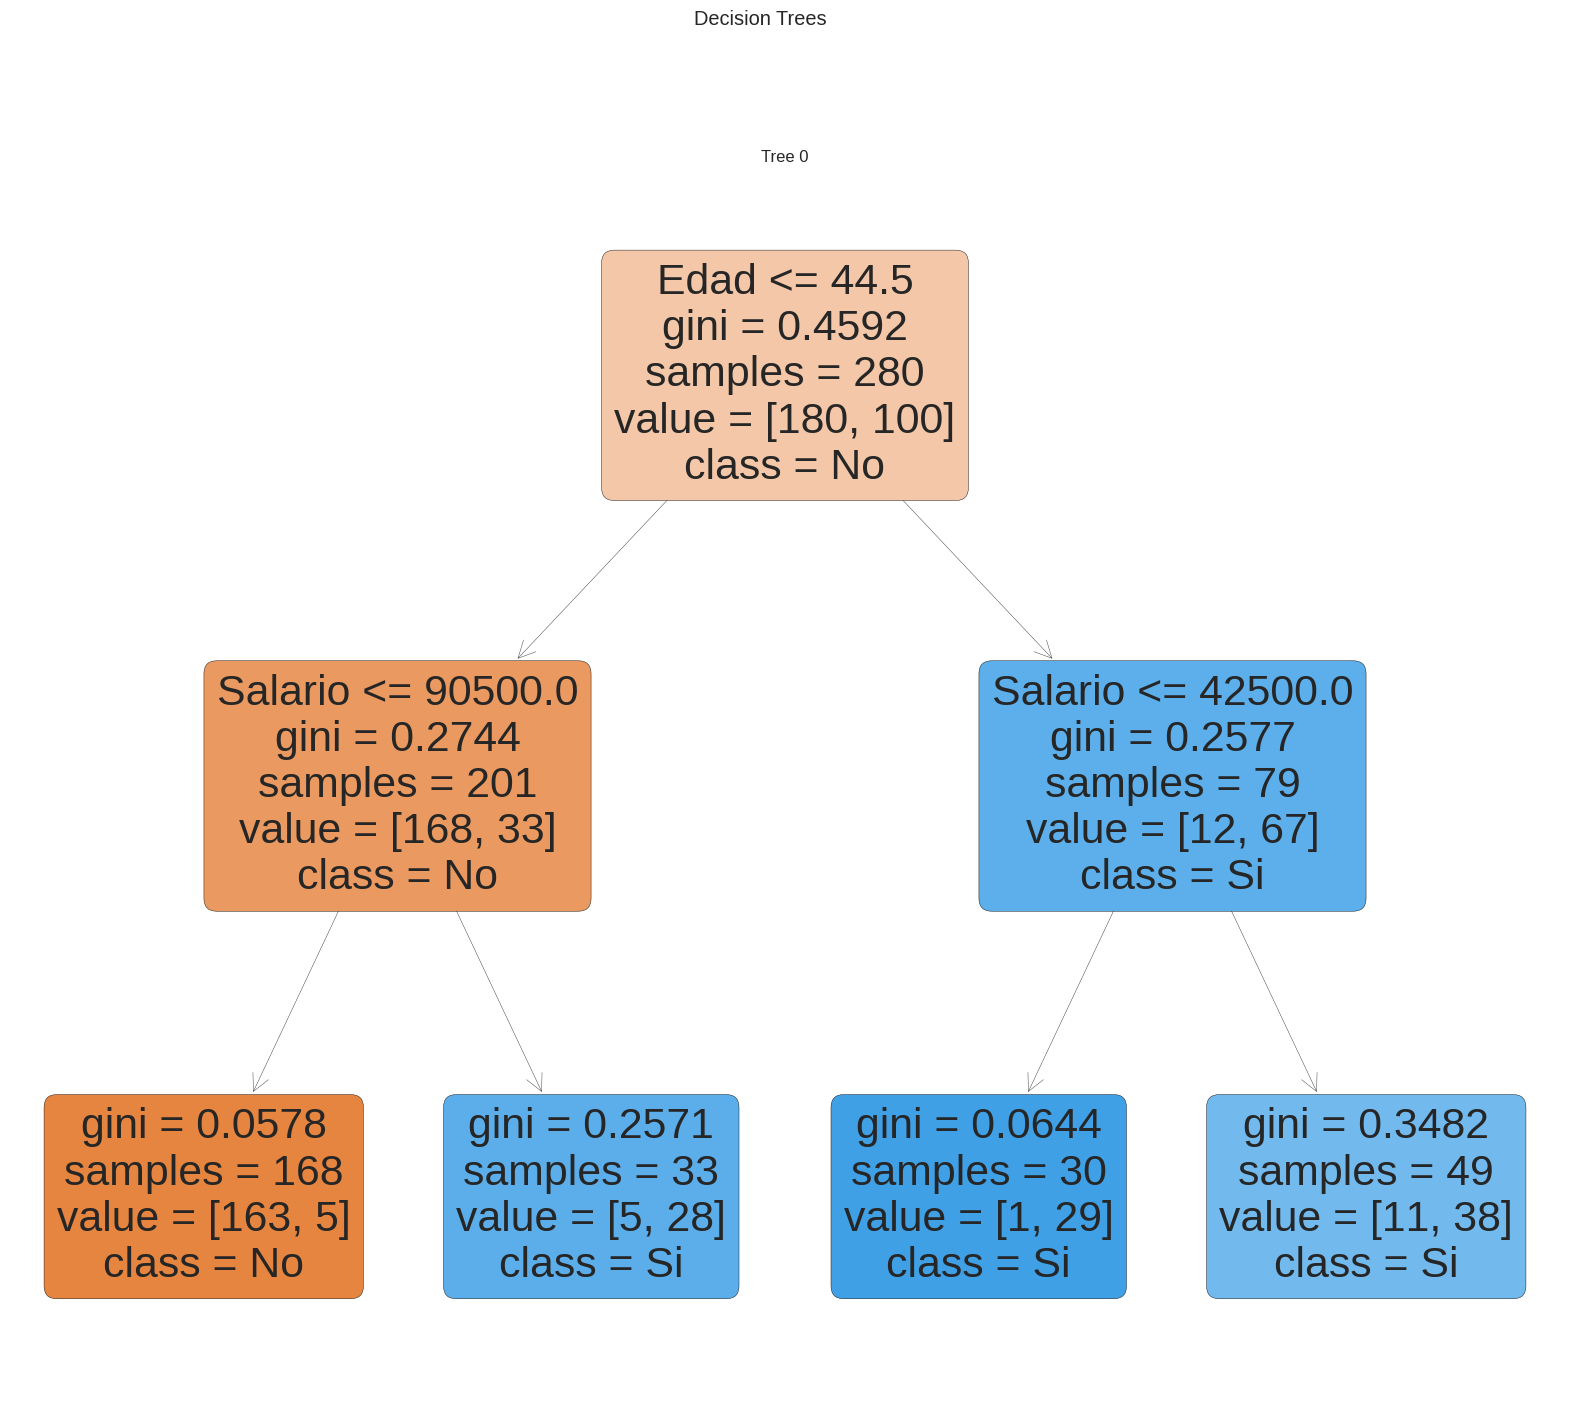

In [25]:
plot_model(dt, plot="tree", scale=1)

 ***El índice de Gini mide el grado de pureza de un nodo. Nos mide la probabilidad de no sacar dos registros de la misma clase del nodo. A mayor índice de Gini menor pureza, por lo que seleccionaremos la variable con menor Gini ponderado.***

 ***Ganancia de información:***
 ***Se utiliza para atributos categóricos (cómo en hombre/mujer). Este criterio intenta estimar la información que aporta cada atributo basado en la “teoría de la información“. Para medir la aleatoriedad de incertidumbre de un valor aleatorio de una variable “X” se define la Entropia.***

 ***Nodos de decisión: indican una decisión que se está tomando en el árbol. Todos los árboles de decisiones comienzan con un nodo de decisión***

#**Parametros de configuracion:**
- criterion= gini, entropy si  utilizamos entradas categóricas
- min_samples_split=2 se refiere a la cantidad mínima de muestras que debe tener un nodo para poder subdividir.
- min_samples_leaf=1 cantidad mínima que puede tener una hoja final.
- class_weight=None IMPORTANTíSIMO: con esto compensamos los desbalances que hubiera.

In [26]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

# ***Metodo del arbol de decision***

 Un arbol de decision tiene una estructura similar   a un diagrama de flujo.
 Parte de un nodo raiz , donde un nodo interno representa una caracteristica o atributo,
La rama representa una regla de decision.
Cada nodo u hoja representa el resultado
 El nodo superior de  un arbol de decision se conoce como el nodo raiz.
 La idea basica del arbolde decision es:
1. Selecciona el mejor atributo, utilizando una medida de  seleccion de atributos o caracteristicas-
2. Hace de ese atributo un nodo de decision y divide el conjunto de datos en un subconjuntos mas pequeños.
3. Comienza la construccion del arbol repitiendo este proceso recursivamente para cada atributo.
4. Hasta que una de las siguientes condiciones coincida.
5. Todas las variables pertenecen al mismo valor de atributo no quedan mas atributos, no hay mas casos.
6. La medida de la seleccion de atributos es una heuristica<(Técnica de la indagación y del descubrimiento.) para seleccionar el criterio de division de los datos de la mejor manera posible.
7. Tambien se conoce como reglas de particion, tambien se conoce como punto de ruptura para un nodo dado.
8. Esta medida proporciona un  rango a cada caracteristica, explicando el conjunto de datos dado.
9. El atributo de mejor puntuacion se seleccionara como atributo de division.
10. En el caso de un atributo de division continuo es necesario definir puntos de division por ramas.
11. Las medidas de seleccion mas populares son las ganancias de informacion, la relacion de ganancia y el indice de gini.
12. ***Ganancia de informacion: cuando usamos un nodo en un arbol de decision para particionar las instancias de informacion en subconjuntos mas pequeños, la entropia cambia.La ganancia de informacion es una medida de este cambio en la entropía.***
13. ***La entropia es la medida de incertidumbre de una variable aleatoria, caracteriza la impureza de una coleccion arbitraria de ejemplos.***
14. ***Cuanto mayor sea la entropia mayor sera el contenido de la informacion.***
15. ***Comenzar con todas las instancias de formacion asociadas al nodo raiz, utilizar la ganancia de informacion para elegir que atibuto etiquetar cada nodo con cual.***
16. Construir recursivamente cada subarbol en el subconjunto de instancias de capacitacion que se clasificarian en ese camino  en el arbol.
17. ***Ninguna ruta de raiz a hoja debe contener el mismo atributo dos veces.***
18. El indice Gini, es un metrica para medir la fecuencia con la que un elemento elegido al azar seria identificado incorrectamente, se debe preferir un atributo con un indice de Gini mas bajo.
19. Las ventajas que tiene el algoritmo de arboles de decision son:
  - son faciles de interpretar y visualizar.
  - Captan patrones no lineales.
  - requiere menos preprocesamiento de datos.
  - no es necesario normalizar las columnas.
  - Se puede utilizar para ingenieria de caracteristicas, como la prediccion de valores perdidos, adecuada para la seleccion de variables.
  - el arbol de decision no tiene suposiciones con respecto a la distibucion debido a la naturaleza no parametrica del algoritmo.
20. Las desventajas del arbol de decision son
  - datos sensibles al ruido, puede sobredimensionar los datos ruidosos(presencia de información irrelevante, errónea o inexacta dentro de un conjunto de datos.).
  - La pequeña variacion de los datos da un arbol de decision diferente.
  - Si hay desequilibrio (es uno donde el número de observaciones pertenecientes aun grupo o clase es significativamente mayor que las pertenecientes a las otras clases.) en el conjunto de datos produce sesgo, se recomienda equilibrar el conjunto de datos.
21. El arbol de decision es un algoritmo que define una dimension comprensible de como el algoritmo toma decisiones.




###**Prediction**

In [27]:
holdout_pred = predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9083,0.9105,0.9083,0.9108,0.9090,0.8037,0.8048


In [28]:
holdout_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 119 to 102
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Trabajo           120 non-null    int8    
 1   Edad              120 non-null    int8    
 2   Salario           120 non-null    int32   
 3   Compra            120 non-null    category
 4   prediction_label  120 non-null    object  
 5   prediction_score  120 non-null    float64 
dtypes: category(1), float64(1), int32(1), int8(2), object(1)
memory usage: 3.8+ KB


###**Datos originales**

In [29]:
new_data = clientes.copy()
new_data.drop('Compra', axis=1, inplace=True)
new_data.head()

,Trabajo,Edad,Salario
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [30]:
predictions = predict_model(dt, data = new_data)
predictions.head()

,Trabajo,Edad,Salario,prediction_label,prediction_score
0,1,19,19000,No,0.9702
1,1,35,20000,No,0.9702
2,0,26,43000,No,0.9702
3,0,27,57000,No,0.9702
4,1,19,76000,No,0.9702


# **<font color="DeepPink">-Prediccion nuevos datos variable objetivo</font>**

In [31]:
predictions.prediction_label.value_counts() #  prediccion de que depositaran el conjunto de clientes del modelo

,count
prediction_label,
No,242
Si,158


In [32]:
porcentaje = 242/400
porcentaje

0.605

In [33]:
porcentaje_vo

0.6425

# **<font color="DeepPink">07 - Save Models</font>**

<h5 align="center"><b>
<font color="DeepPink">
<b><mark>Setup</mark> ▶ <mark>Compare Models</mark> ▶ <mark>Analyze Model</mark> ▶ <mark>Prediction</mark> ▶ <mark>Save Model</mark>


In [34]:
save_model(dt, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Trabajo', 'Edad', 'Salario'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                     

In [35]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Trabajo', 'Edad', 'Salario'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              mis...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=2,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, random_state=123,
                                        splitter='best'))],
         verbose=False)